N_star=28, N_gal=22

First 50 sources: E(theta|y)=0.56


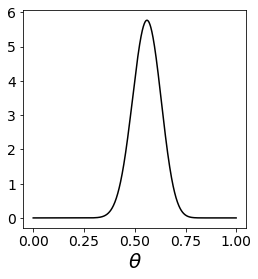

In [7]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import scipy.stats as stats

#read fits table file
def loadData(filename):
    '''
    Read fits data
    
    '''
    tchfits = fits.open(filename)
    tabl = tchfits[1].data
    return tabl


#fraction of star/galaxy in a small field of sky
#read fits table downloaded from SDSS website
#'types = 3' represents star, 'types = 6' represents galaxy
filename = 'sdss_field.fits'
sdss = loadData(filename)

#part 1 prior without information
#demonstrate the first 50 data
types = sdss.type[0:50]
Nstar = np.sum(types==3) #the result of 'types==3' is True(1) or False(0)
N = 50
print ('N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar,'d2':np.sum(types==6)})
E_th_y = (Nstar+1.)/(N+2.)#expection of posterior distribution
print (r'First 50 sources: E(theta|y)=%(n).2f' % {'n': E_th_y})

#posterior distribution, with uniform prior distribution
theta = np.arange(0,1,0.001)
p = stats.beta.pdf(theta,Nstar+1,N-Nstar+1)

#draw the posterior density curve
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k-')
ax.set_xlabel(r'$\theta$',fontsize=20)
matplotlib.rc('xtick',labelsize = 14)
matplotlib.rc('ytick',labelsize = 14)

N_star=33, N_gal=17

Second 50 sources: E(theta|y)=0.65
Second 50 sources with the prior from the first 50: E(theta|y)=0.61


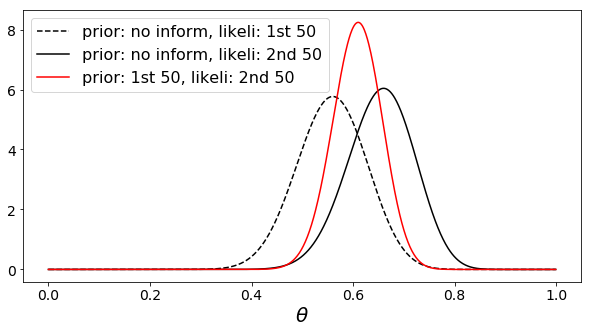

In [35]:
#part 2 conjugate prior
#conjugate prior determined by the first 50
alpha = Nstar+1
beta = N-Nstar+1

#likelihood determined by 51~100 data
types = sdss.type[50:100]
Nstar2 = np.sum(types==3)
N2 = 50
print ('N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar2,'d2':np.sum(types==6)})
E_th_y = (Nstar2+1.)/(N2+2.)#expection of posterior distribution
print (r'Second 50 sources: E(theta|y)=%(n).2f' % {'n': E_th_y})

#posterior with uniform prior
p2_0 = stats.beta.pdf(theta,Nstar2+1,N2-Nstar2+1)
#posterior with conjugate prior
p2 = stats.beta.pdf(theta,Nstar2+alpha,N2-Nstar2+beta)

#predict the fraction of stars from the second 50 sources
print (r'Second 50 sources with the prior from the first 50: E(theta|y)=%(n).2f' %\
    {'n': (Nstar2+alpha)/np.float(N2+alpha+beta)})
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k--',label = 'prior: no inform, likeli: 1st 50')
ax.plot(theta,p2_0,'k-',label = 'prior: no inform, likeli: 2nd 50')
ax.plot(theta,p2,'r-',label = 'prior: 1st 50, likeli: 2nd 50')
ax.set_xlabel(r'$\theta$',fontsize=20)
matplotlib.rc('xtick',labelsize = 14)
matplotlib.rc('ytick',labelsize = 14)
plt.legend(loc='upper left',fontsize = 16)

N_star=363, N_gal=187

550 sources with conjugate prior: theta=0.6594
550 sources: theta=0.6600


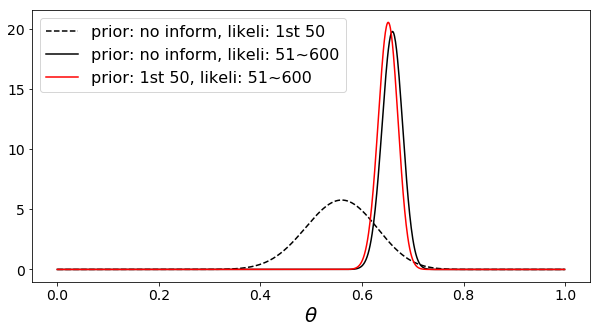

In [41]:
#part 3 when data increases prior play less role
#conjugate prior determined by the first 50
alpha = Nstar+1
beta = N-Nstar+1

#likelihood determined by 51~600 data
types = sdss.type[50:600]
Nstar2 = np.sum(types==3)
N2 = 550
print ('N_star=%(d1)d, N_gal=%(d2)d\n' % {'d1':Nstar2,'d2':np.sum(types==6)})
E_th_y = (Nstar2+1.)/(N2+2.)
print ('550 sources with conjugate prior:',r'theta=%(d1).4f' % {'d1':E_th_y})
print ('550 sources: theta=%(d1).4f' %{'d1':Nstar2/550.})

#posterior with uniform prior
p2_0 = stats.beta.pdf(theta,Nstar2+1,N2-Nstar2+1)
#posterior with conjugate prior
p2 = stats.beta.pdf(theta,Nstar2+alpha,N2-Nstar2+beta)

#predict the fraction of stars from 51~100 sources
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.plot(theta,p,'k--',label = 'prior: no inform, likeli: 1st 50')
ax.plot(theta,p2_0,'k-',label = 'prior: no inform, likeli: 51~600')
ax.plot(theta,p2,'r-',label = 'prior: 1st 50, likeli: 51~600')
ax.set_xlabel(r'$\theta$',fontsize=20)
matplotlib.rc('xtick',labelsize = 14)
matplotlib.rc('ytick',labelsize = 14)
plt.legend(loc='upper left',fontsize = 16)